# During the lockdown I published my first book titled Inspiration:Thoughts on Spirituality,Technology,Wealth,Leadership and Motivation.The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA .
# E Book is availabe for Rs 99 in India.Paperback Edition of the book is available on Amazon.com link https://lnkd.in/gkFYYMJ

This is a countrywide traffic accident dataset, which covers 49 states of the United States. The data is continuously being collected from February 2016, using several data providers, including two APIs which provide streaming traffic event data. These APIs broadcast traffic events captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 2.25 million accident records in this dataset.In this Kernel we will be covering following topic.

1.Data Preprocessing 

2.Data Exploration and Vizualization 

3.Conclusion

This kernel is work in process.If you like my work please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/usa-timezone/timezone.png
/kaggle/input/us-accidents/US_Accidents_Dec20.csv
/kaggle/input/usa-time-zone-state-code/usa-timezone-map.jpg


# 1.Data Preprocessing 

### Importing modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use('fivethirtyeight')

### Importing the dataset

In [3]:
df=pd.read_csv('../input/us-accidents/US_Accidents_Dec20.csv')

### Displaying the dataset

In [4]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


### Summary of Data

In [5]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 4232541
Columns  : 49

Features :
     : ['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

Missing values    : 14698523

Unique values :  
 ID                       4232541
Source                         3
TMC                           21
Severity                       4
Start_Time               3657563
End_Time                 3775982
Start_Lat                

This is quite a huge dataset with 49 features and more than 35 lac row of data.

### Finding out columns with Catogerical Values

In [6]:
df.select_dtypes(exclude=['int','float']).columns

Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

So we have the above mentioned columns which have catogerical values

### Displaying Data in Description Column

In [7]:
df['Description'].head()

0    Right lane blocked due to accident on I-70 Eas...
1    Accident on Brice Rd at Tussing Rd. Expect del...
2    Accident on OH-32 State Route 32 Westbound at ...
3    Accident on I-75 Southbound at Exits 52 52B US...
4    Accident on McEwen Rd at OH-725 Miamisburg Cen...
Name: Description, dtype: object

### Displaying Catogerical values

In [8]:
print(df['Source'].unique())
print(df['Description'].unique())
print(df['Timezone'].unique())
print(df['Amenity'].unique())

['MapQuest' 'MapQuest-Bing' 'Bing']
['Right lane blocked due to accident on I-70 Eastbound at Exit 41 OH-235 State Route 4.'
 'Accident on Brice Rd at Tussing Rd. Expect delays.'
 'Accident on OH-32 State Route 32 Westbound at Dela Palma Rd. Expect delays.'
 ... 'Ramp closed to Bristol St - Road closed due to accident.'
 'At Friars Rd - Accident. Center lane blocked.'
 'Ramp closed to The City Dr/Exit 14A - Road closed due to accident.']
['US/Eastern' 'US/Pacific' nan 'US/Central' 'US/Mountain']
[False  True]


Above method can be used to display the lables in the categorical feature.

### Missing Values

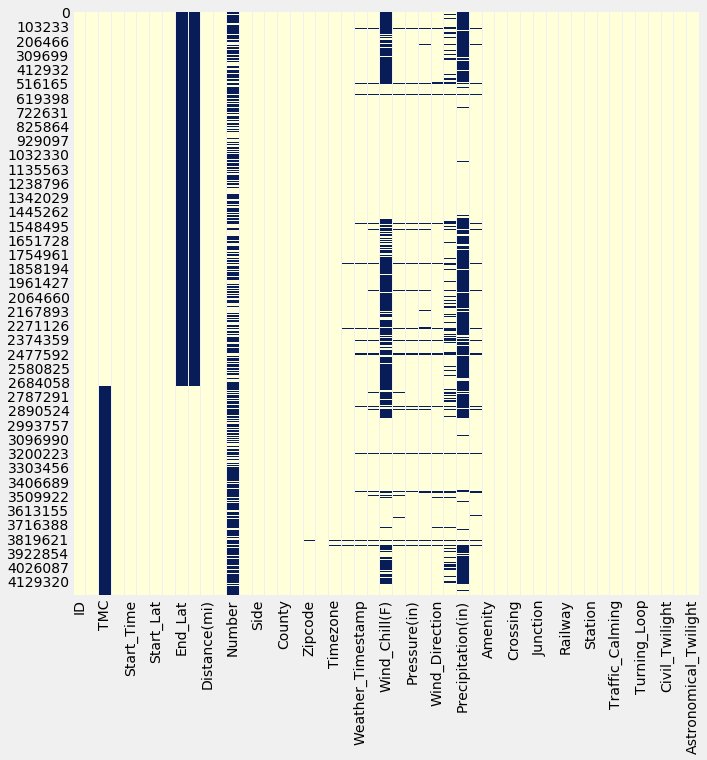

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False,cmap='YlGnBu')
plt.ioff()

We can see that there more missing values in columns TMC,Start_Lat,End_lat,Number,Wind_chill and Precipation.

In [10]:
#make a list of the variables that contain missing values
vars_with_na=[var for var in df.columns if df[var].isnull().sum()>1]

#print the variable name and the percentage of missing values 
for var in vars_with_na:
    print(var,np.round(df[var].isnull().mean(),3),'% missing values')


TMC 0.358 % missing values
End_Lat 0.642 % missing values
End_Lng 0.642 % missing values
Description 0.0 % missing values
Number 0.635 % missing values
City 0.0 % missing values
Zipcode 0.0 % missing values
Timezone 0.001 % missing values
Airport_Code 0.002 % missing values
Weather_Timestamp 0.015 % missing values
Temperature(F) 0.021 % missing values
Wind_Chill(F) 0.448 % missing values
Humidity(%) 0.023 % missing values
Pressure(in) 0.018 % missing values
Visibility(mi) 0.023 % missing values
Wind_Direction 0.02 % missing values
Wind_Speed(mph) 0.113 % missing values
Precipitation(in) 0.488 % missing values
Weather_Condition 0.023 % missing values
Sunrise_Sunset 0.0 % missing values
Civil_Twilight 0.0 % missing values
Nautical_Twilight 0.0 % missing values
Astronomical_Twilight 0.0 % missing values


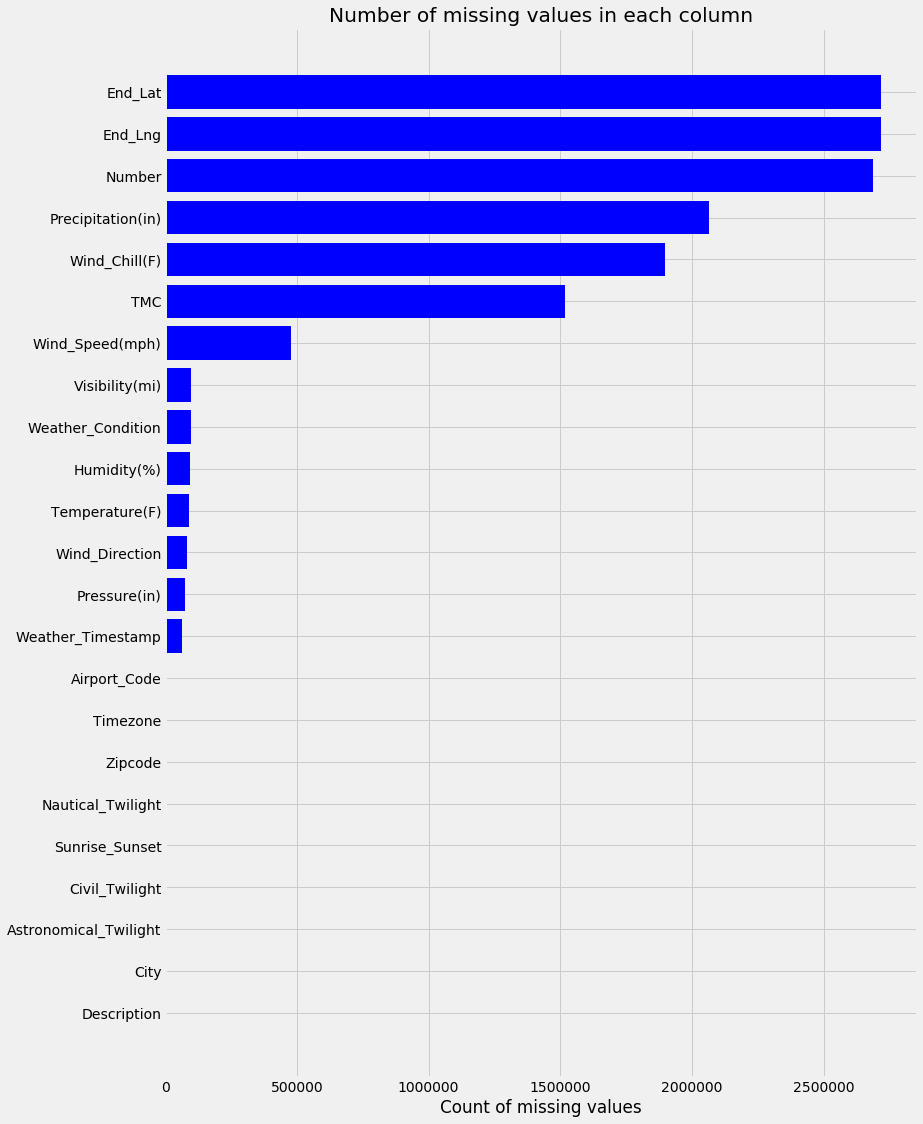

In [11]:
import warnings
import warnings
warnings.filterwarnings('ignore')
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.5
fig,ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind,missing_df.missing_count.values,color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

Here we have demonstrated different methods of displaying Missing values

### Correlation

In [12]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# 2.Data Vizualization

## Heat Map

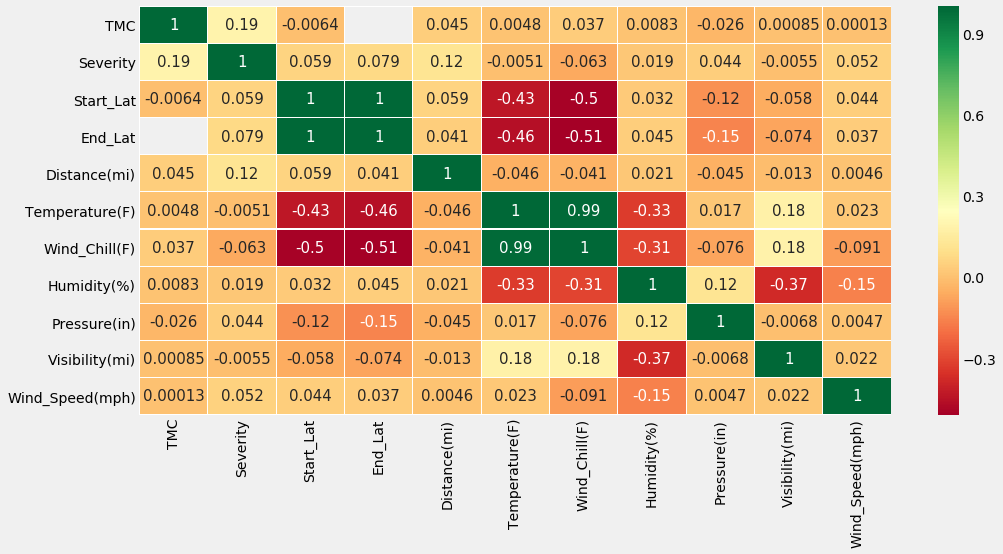

In [13]:
fig=sns.heatmap(df[['TMC','Severity','Start_Lat','End_Lat','Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

We can see a very high correlation between the wind_chill and temperature.So when we are using this feature to predict severity than we can drop either wind_chill or the temperare column.

### Source

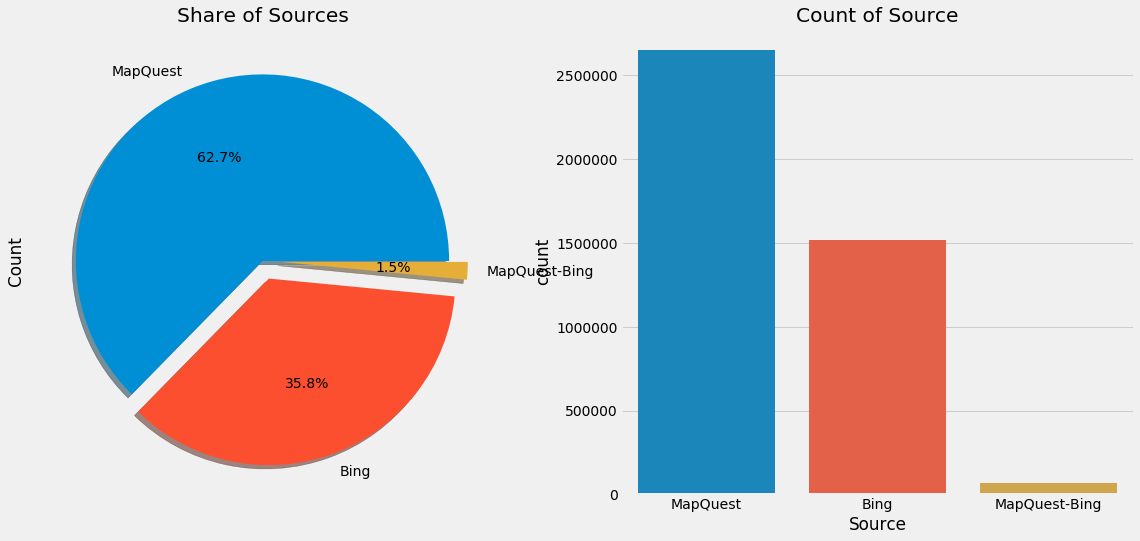

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Source'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Sources')
ax[0].set_ylabel('Count')
sns.countplot('Source',data=df,ax=ax[1],order=df['Source'].value_counts().index)
ax[1].set_title('Count of Source')
plt.show()

We can clearly see that most of the data is acquired from MapQuest(69%) followed by Bing(29.5%)

MapQuest is an American free online web mapping service. It was launched in 1996 as the first commercial web mapping service. MapQuest vies for market share with competitors such as Google Maps and Here

### Severity

It shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

### Count Pie and Bar Plot

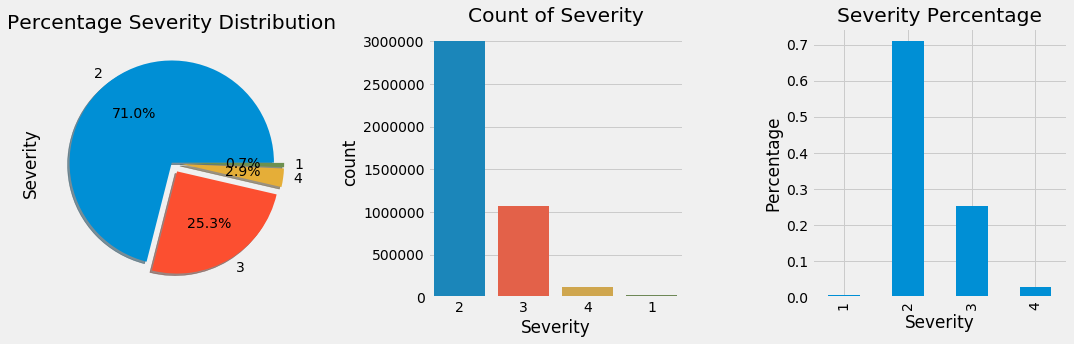

In [15]:
f,ax=plt.subplots(1,3,figsize=(15,5))
df['Severity'].value_counts().plot.pie(explode=[0,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentage Severity Distribution')
#ax[0].set_ylabel('Count')
sns.countplot('Severity',data=df,ax=ax[1],order=df['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')
df.Severity.value_counts(normalize=True).sort_index().plot.bar(ax=ax[2])
ax[2].set_title('Severity Percentage')
ax[2].set_xlabel('Severity')
ax[2].set_ylabel('Percentage')
#plt.grid()
#plt.title('Severity')
#plt.xlabel('Severity')
#plt.ylabel('Fraction');
plt.tight_layout()
plt.show()

67.5 % Accidents fall in the Severity class 2 followed by Severity class 3,4 and 1.

### Side 

In [16]:
df['Side'].unique()

array(['R', 'L', ' '], dtype=object)

There are three things mentioned in feature Side ie Right,Left and third one is a blank space.Not very sure what is it.

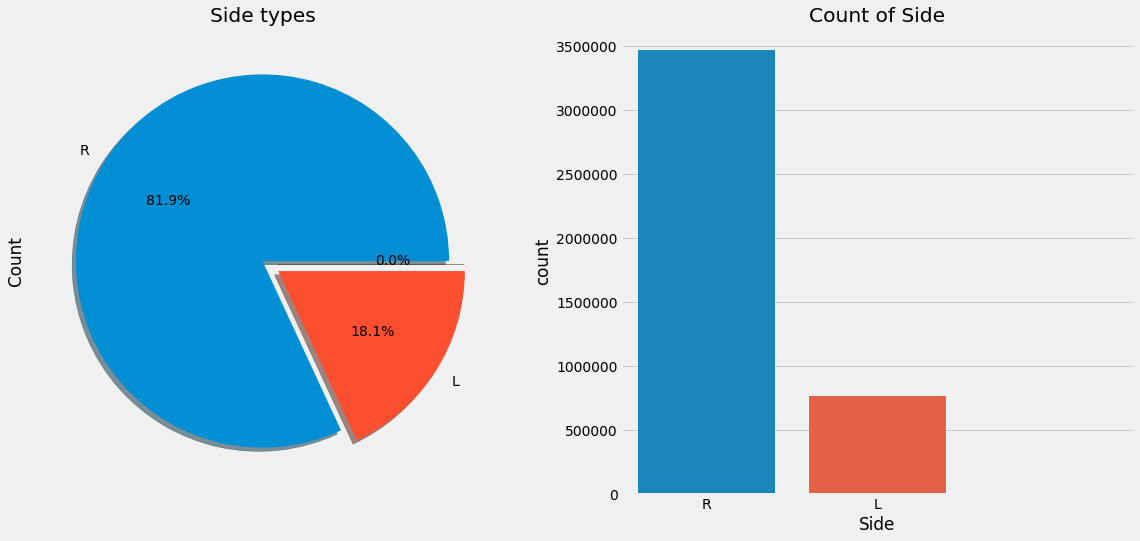

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Side'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Side types')
ax[0].set_ylabel('Count')
sns.countplot('Side',data=df,ax=ax[1],order=df['Side'].value_counts().index)
ax[1].set_title('Count of Side')
plt.show()

### Time Zone

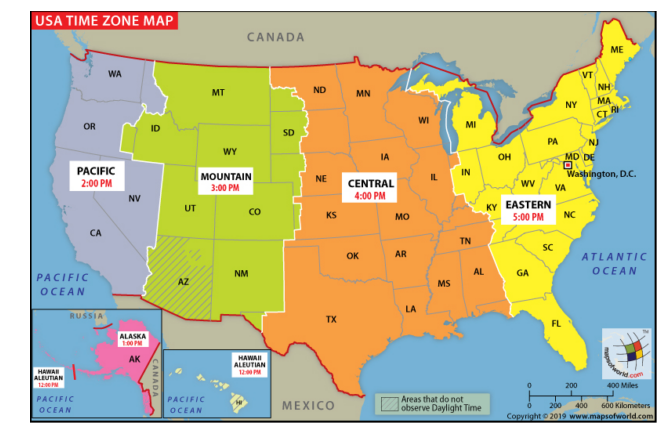

In [18]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import numpy as np
img=np.array(Image.open('../input/usa-time-zone-state-code/usa-timezone-map.jpg'))
fig=plt.figure(figsize=(10,10))
plt.imshow(img,interpolation='bilinear')
plt.axis('off')
plt.show()

USA has four time zones Pacific,Mountain,Central and Eastern as we move from West to the east of the country.

### Accident count in Different Time Zones

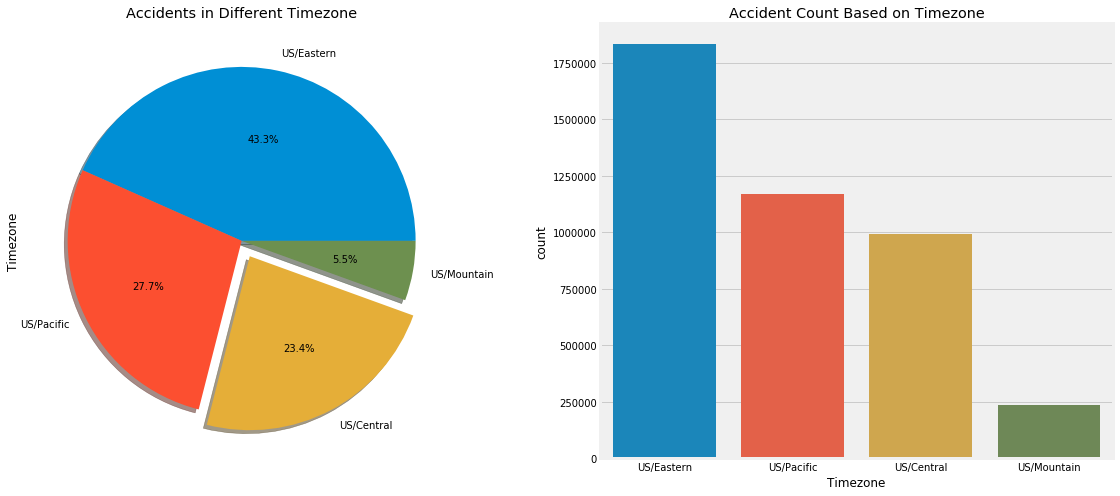

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Timezone'].value_counts().plot.pie(explode=[0,0,0.1,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Accidents in Different Timezone')
#ax[0].set_ylabel('Count')
sns.countplot('Timezone',data=df,ax=ax[1],order=df['Timezone'].value_counts().index)
ax[1].set_title('Accident Count Based on Timezone')
plt.show()

More accident happen in the Eastern Time Zone.States like Pennsylvania and South Carolina fall in the Eastern time Zone.

The reason for more accidents in Eastern time zone could be due to higher population density in those areas.

### Time taken to clear the traffic

In [20]:
st = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
end = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')

top 20 accident durations correspond to 72.0% of the data


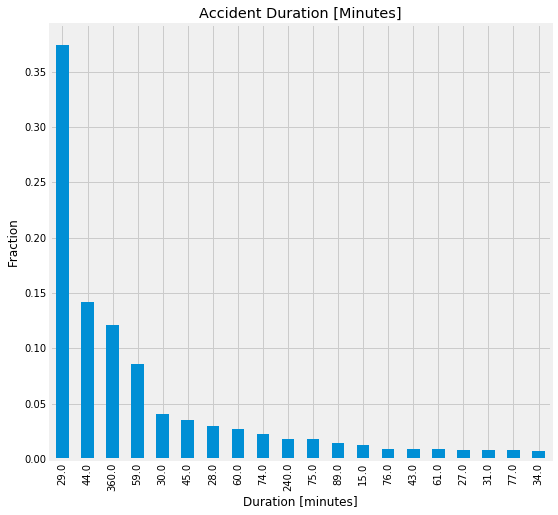

In [21]:
diff = (end-st)
top20 = diff.astype('timedelta64[m]').value_counts().nlargest(20)
print('top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(diff)))
(top20/top20.sum()).plot.bar(figsize=(8,8))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [minutes]')
plt.ylabel('Fraction');

From the above curve we can see that most of the accidents take less than an hours time to get resolved.But more than 15% of the accidents are taking 360 minutes to resolve.

### State

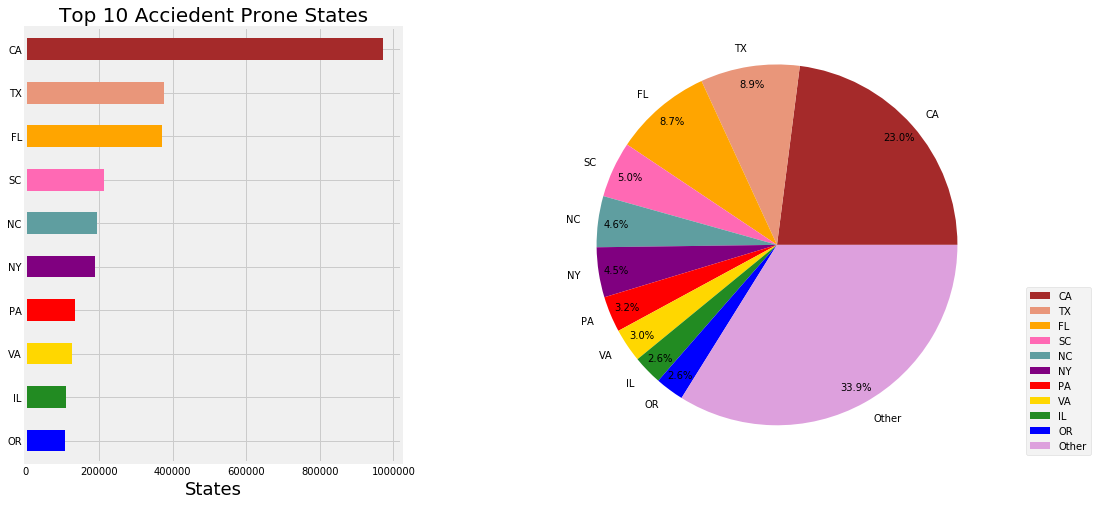

In [22]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
df.State.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 Acciedent Prone States",size=20)
ax[0].set_xlabel('States',size=18)


count=df['State'].value_counts()
groups=list(df['State'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')
pass

We can see that more accidents are happening in state of California(CA), Texas(TX) and Florida(FL)

### Bar Plot Severity Vs State

In [23]:
df_top_Severity_State = df.groupby('State').agg({'Severity': 'mean'}).sort_values('Severity').reset_index()

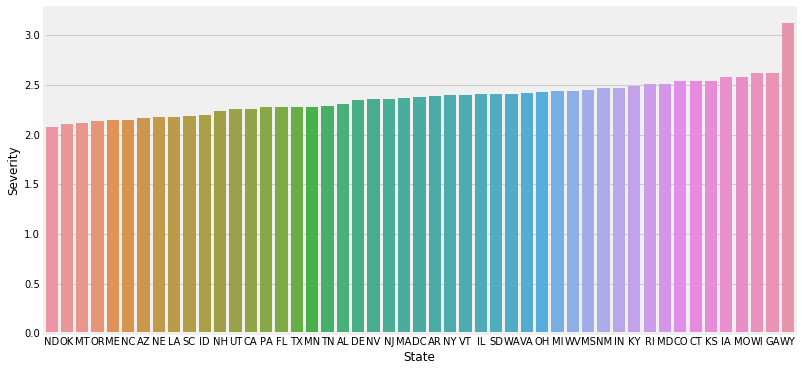

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(y="Severity", x="State", data=df_top_Severity_State.head(49))
plt.ioff()

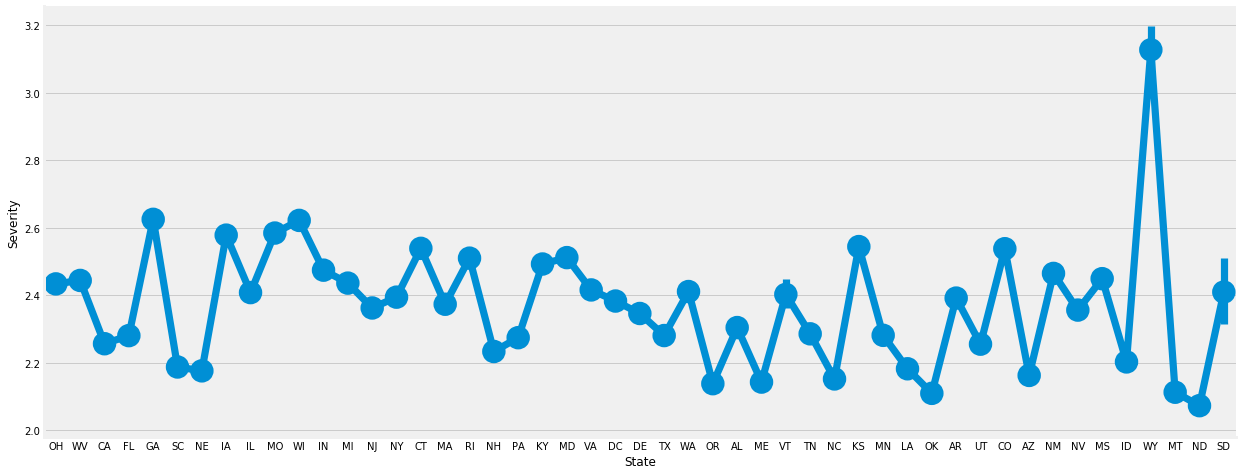

In [25]:
sns.factorplot('State','Severity',data=df)
fig=plt.gcf()
fig.set_size_inches(20,7)
plt.show()

We can see South Dakota (SD),Wyoming(WY) and North Dakota(ND) have the accidents with high severity.

### Weather 

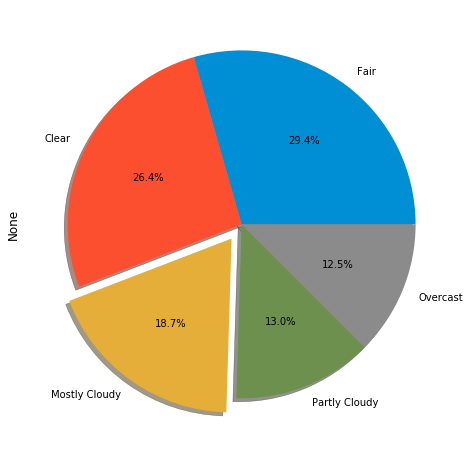

In [26]:
plt.figure(figsize=(14,8))
df.groupby('Weather_Condition') \
        .size() \
        .sort_values(ascending = False) \
        .iloc[:5] \
        .plot.pie(explode=[0,0,0.1,0,0],autopct='%1.1f%%',shadow=True)
plt.ioff()

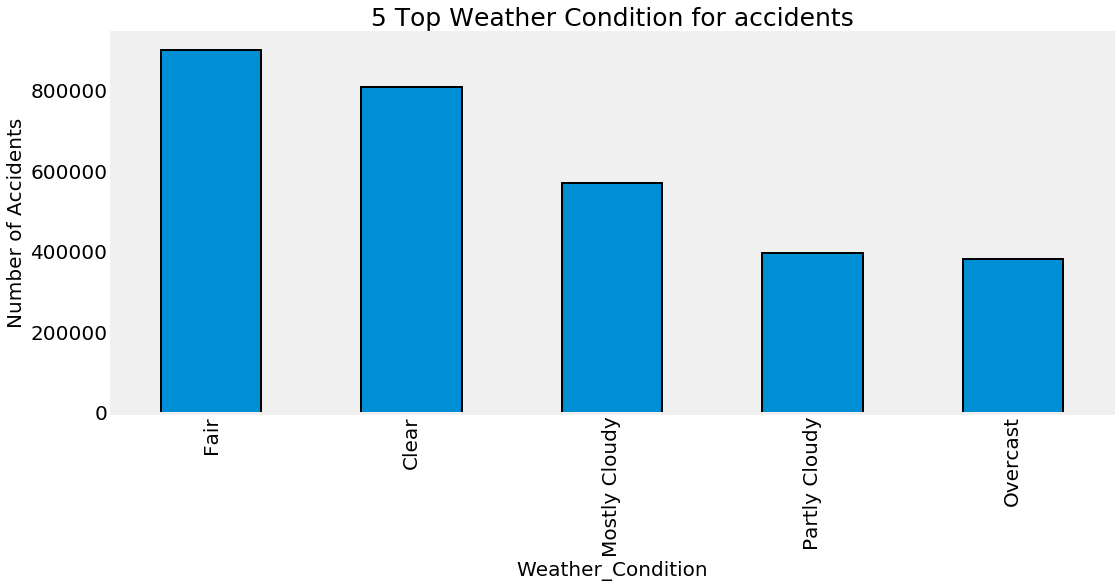

In [27]:
fig, ax=plt.subplots(figsize=(16,7))
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top Weather Condition for accidents',fontsize=25)
plt.grid()
plt.ioff()

Suprisingly most accidents occur when the weather is clear.May be people drive more carefully when the weather is bad.

### Where are Accidents occuring

In [28]:
bool_cols = [col for col in df.columns if df[col].dtype ==np.dtype('bool')]
booldf = df[bool_cols]
not_one_hot = booldf[booldf.sum(axis=1) > 1]
print('There are {} non one hot metadata rows, which are {:.1f}% of the data'.format(len(not_one_hot),100*len(not_one_hot)/len(df)))

There are 349685 non one hot metadata rows, which are 8.3% of the data


In [29]:
bools = booldf.sum(axis=0)

In [30]:
bools

Amenity             49430
Bump                  861
Crossing           347417
Give_Way            13195
Junction           339642
No_Exit              5969
Railway             38513
Roundabout            237
Station             86166
Stop                72183
Traffic_Calming      2121
Traffic_Signal     728111
Turning_Loop            0
dtype: int64

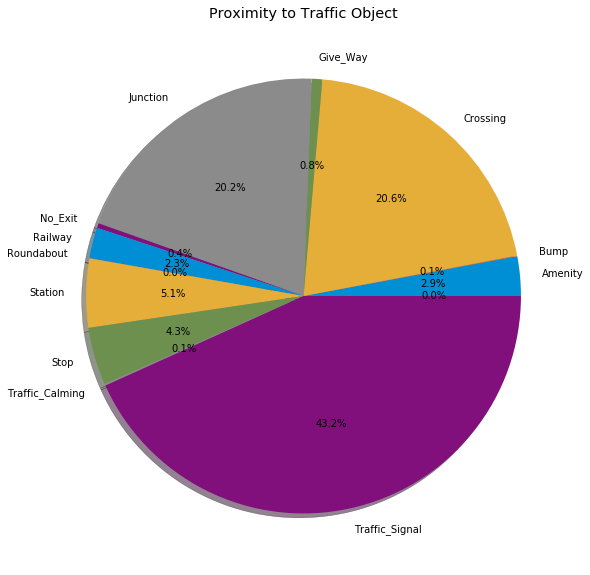

In [31]:
bools.plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,10))
plt.ylabel('')
plt.title('Proximity to Traffic Object');

We can see that more accidents are happening near traffic signal,junction and crossings

### Accident Count

In [32]:
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
df = df.set_index('time')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 06:07:59,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:49:27,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
2016-02-08 07:23:34,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
2016-02-08 07:39:07,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


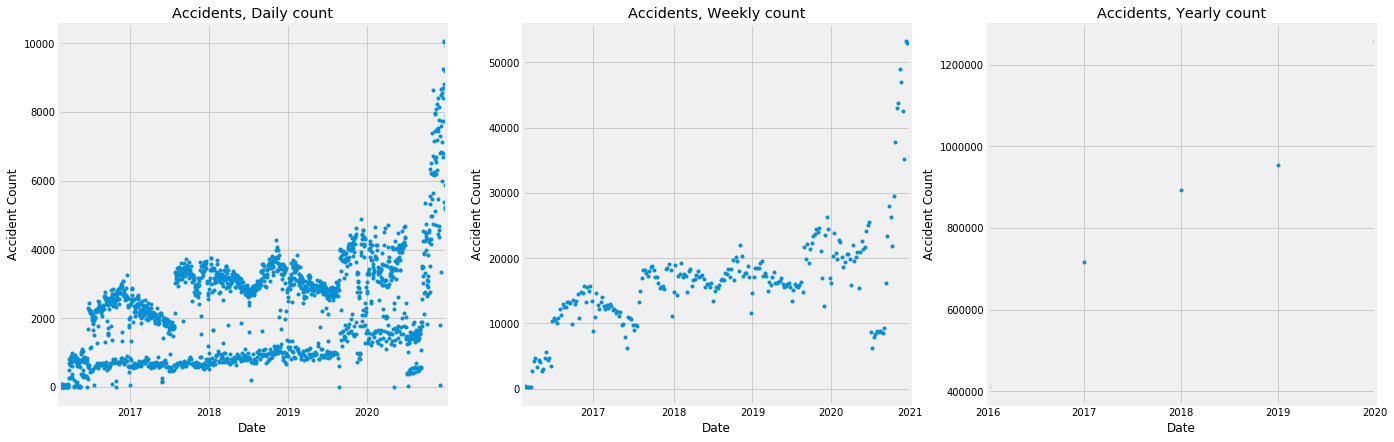

In [33]:
freq_text = {'D':'Daily','W':'Weekly','Y':'Yearly'}
plt.subplots(1,3,figsize=(21,7))
for i, (fr,text) in enumerate(freq_text.items(),1):
    plt.subplot(1,3,i)
    sample = df.ID['2016':].resample(fr).count()
    sample.plot(style='.')
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

Accident count has been increasing and it also has a seasonality trend.

In [34]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format="%Y/%m/%d %H:%M:%S")
df['DayOfWeekNum'] = df['Start_Time'].dt.dayofweek
df['DayOfWeek'] = df['Start_Time'].dt.weekday_name
df['MonthDayNum'] = df['Start_Time'].dt.day
df['HourOfDay'] = df['Start_Time'].dt.hour

In [35]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,Night,Night,Night,Night,0,Monday,8,5
2016-02-08 06:07:59,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,Night,Night,Night,Day,0,Monday,8,6
2016-02-08 06:49:27,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,True,False,Night,Night,Day,Day,0,Monday,8,6
2016-02-08 07:23:34,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,Night,Day,Day,Day,0,Monday,8,7
2016-02-08 07:39:07,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,True,False,Day,Day,Day,Day,0,Monday,8,7


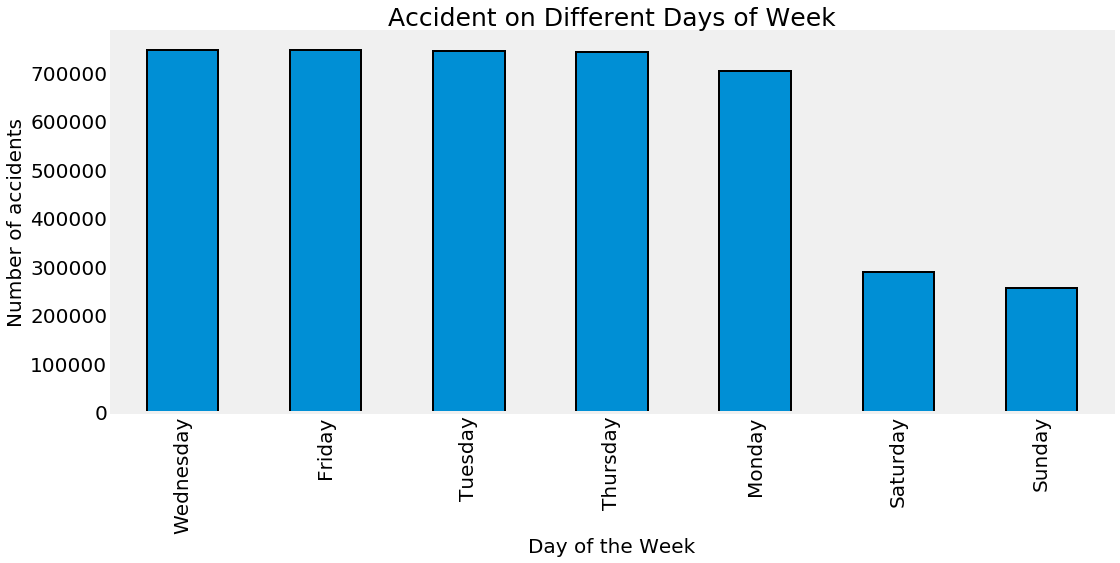

In [36]:
fig, ax=plt.subplots(figsize=(16,7))
df['DayOfWeek'].value_counts(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Day of the Week',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Accident on Different Days of Week',fontsize=25)
plt.grid()
plt.ioff()

We can see that more accidents happen on weekdays and and less on weekends.

### Description

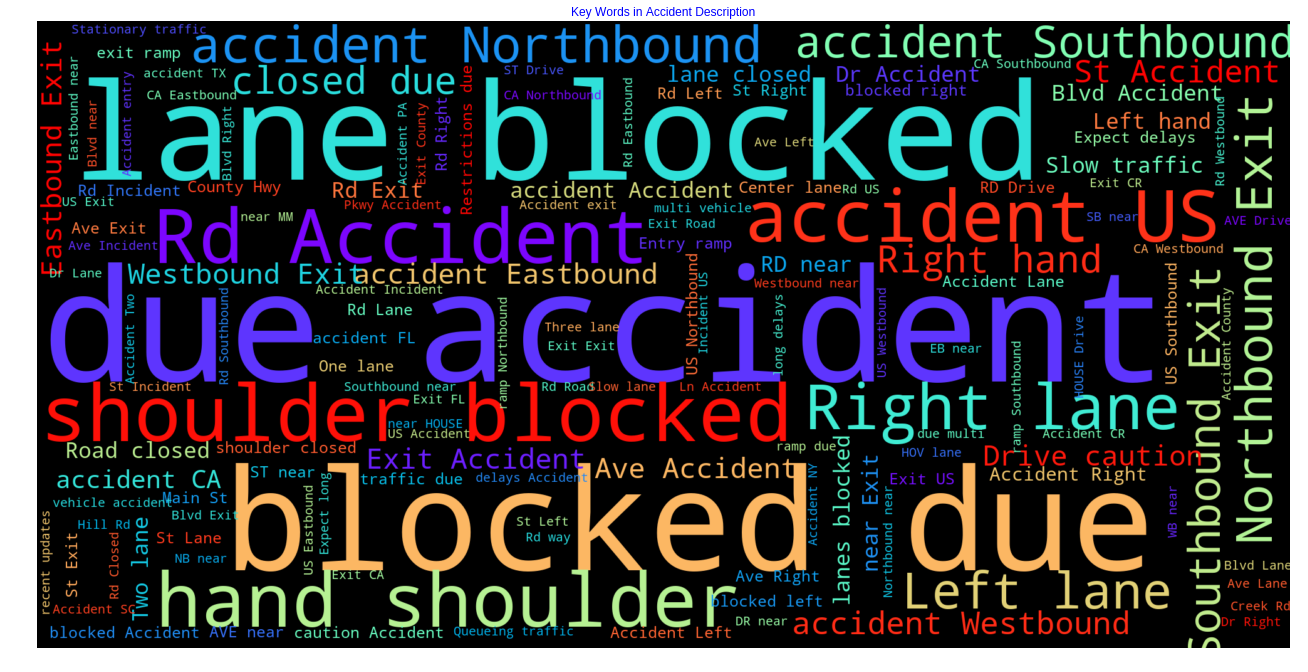

In [37]:
from wordcloud import WordCloud
plt.style.use('seaborn')
wrds1 = df["Description"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="black").generate(" ".join(wrds1))
plt.figure(figsize=(20,14))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in Accident Description",color='b')
plt.show()

### Scatter Plot

<Figure size 1008x576 with 0 Axes>

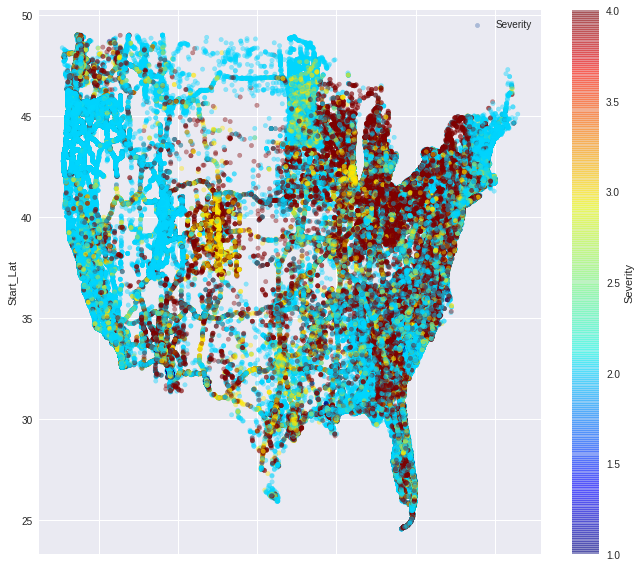

In [38]:
plt.figure(figsize=(14,8))
sub_6=df[df.Severity<5]
viz_4=sub_6.plot(kind='scatter', x='Start_Lng',y='Start_Lat',label='Severity',c='Severity',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,10))
viz_4.legend()
plt.ioff()

Even though more accidents happen in the state of California we can see that more severe Accidents happen to the North Eastern States of USA

# 3.Conclusion 

1.We see that the feature wind_speed and temperature have high correlation.So if we use this dataset fr making prediction we can drop one of the feature from our machine learning model.

2.Accident data is collected from three sources namely MapQuest,Bing Source and MapQuest-Bing.Most of the data is collected from MapQuest platform.

3.Accidents are categorised into four groups (1-4) based on their Severity.1 being least and 4 being more severe.Most of the accidents(67.5%) fall in the severity category 2.

4.Most of the accidents happen on right side (82%) and remaining 18% on the right side.There is another label blank in the dataset.I guess it means blank spots on the road.

5.USA has four time zones namely Eastern,Central,Mountain and Pacific.More accidents happen in the Eastern time zone (42.3%) followed by Pacific(28%),Central(24%) and Mountain(5.7%).The percentage of accidents is correlated to the populaton density of USA.The East and the West coas has more populaton.He we can see that there are more accidents in thoe areas.

6.We can see that most of the accidents get cleared within 30 min and in sum cases accidents may take upto 6 hours to clear.

7.We can see that when we go on the state level more accidents happen in the state of California(CA),Texas(TX) and Florida(FL).South Dakota (SD),Wyoming(WY) and North Dakota(ND) have the accidents with high severity.Even though more accidents happen in the state of California we can see that more severe Accidents happen to the North Eastern States of USA

8.Our assumpion generally is that bad weather could lead to more accidents.But here we can see that more accidents occur when the weather is clear.This may be beause people drive more carefully when the weather is bad.

9.Most of the accidents occur at Traffic_Signal(44.7%) followed by Junction(20.4%),Crossing(19.7%),Station(5%),Stop(3.7%).So to reduce accidents states and the traffic police need to focus in these areas to reduce accidents.If these are due to some infrastructure problems then they need to be resolved.

10.From the year 2017 to 2020 the accident cont has been increasing and also shows a seasonal trend.From the weekwise analysis we can see that more accidents happen on Weekdays and less on Weekends.This is because there is more traffic on roads on weekdays.

# TO BE CONTINUED